# K Means Color Quantization

### Imports


In [21]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [22]:
image_as_array = mpimg.imread('palm_trees.jpg')

In [23]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  98],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 106],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 114],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

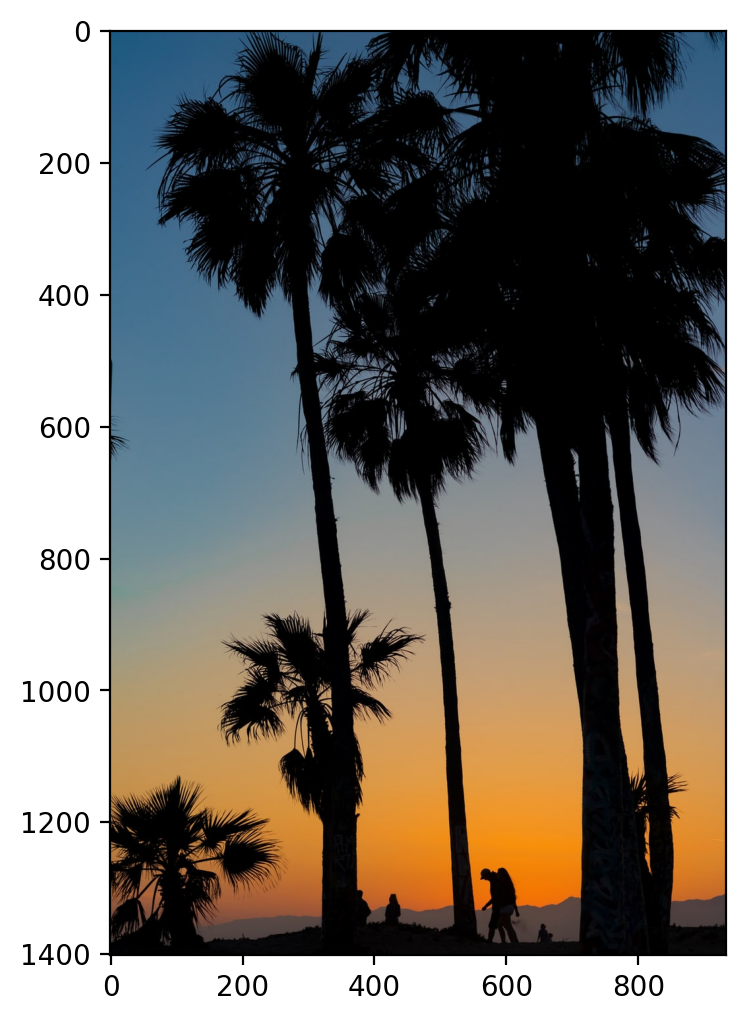

In [24]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [25]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [26]:
(h,w,c) = image_as_array.shape

In [27]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [28]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=6)

In [30]:
model

KMeans(n_clusters=6)

In [31]:
labels = model.fit_predict(image_as_array2d)

/home/vahid/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
labels

array([4, 4, 4, ..., 1, 1, 1], dtype=int32)

In [33]:
# THESE ARE THE 6 RGB COLOR CODES!
model.cluster_centers_

array([[219.07865179, 135.33126974,  46.77956683],
       [  2.76456007,   2.56495329,   3.67443215],
       [137.06649368, 143.83458336, 143.81153601],
       [191.79627118, 154.48736359, 109.17624431],
       [ 71.36561334, 109.29416553, 137.55421493],
       [ 67.25933087,  61.59537278,  61.87166055]])

In [34]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [35]:
rgb_codes

array([[219, 135,  47],
       [  3,   3,   4],
       [137, 144, 144],
       [192, 154, 109],
       [ 71, 109, 138],
       [ 67,  62,  62]])

In [36]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [37]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

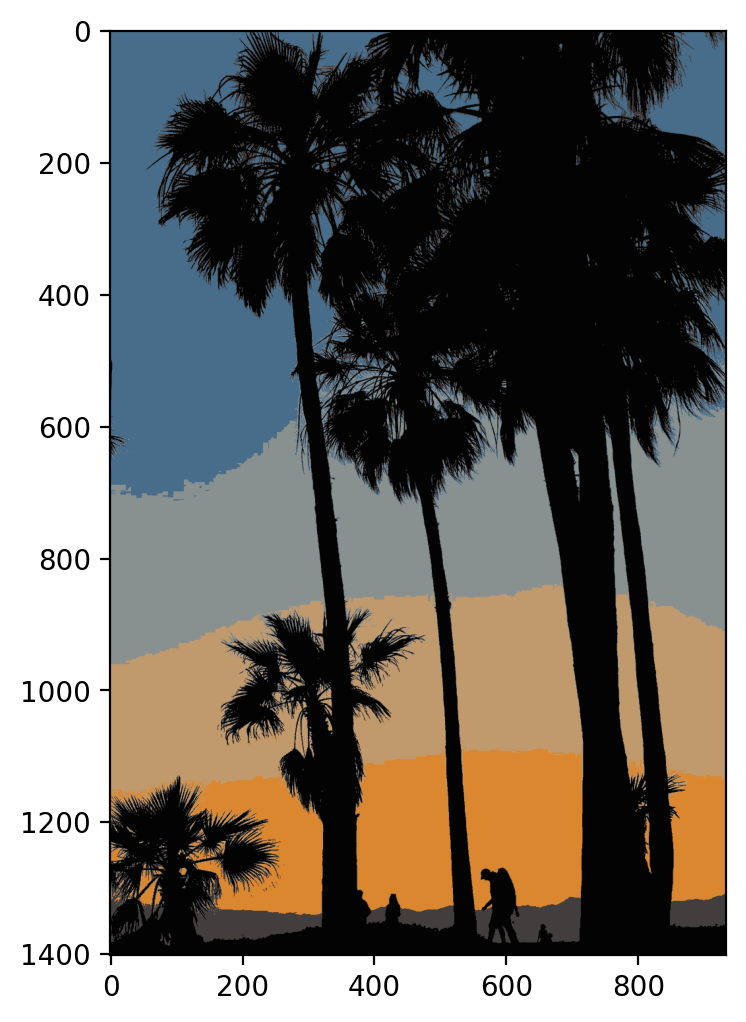

In [38]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)